In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df = df.iloc[: , 1:]

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:

df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [8]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

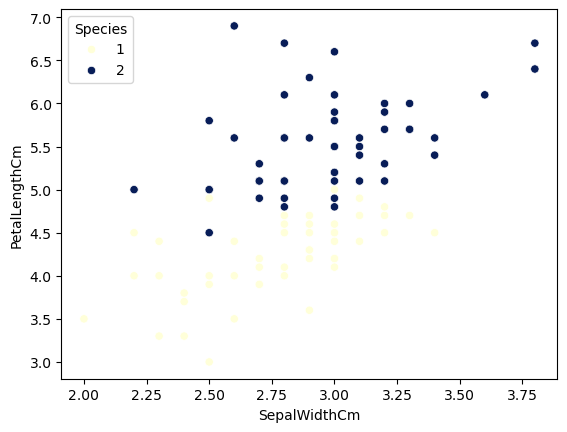

In [9]:
sns.scatterplot(x = 'SepalWidthCm' , y = 'PetalLengthCm' , data = df , hue = 'Species',palette= 'YlGnBu')

In [10]:
df_train = df.iloc[:60 , :].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
107,2.9,6.3,2
83,2.7,5.1,1
93,2.3,3.3,1
67,2.7,4.1,1
57,2.4,3.3,1
55,2.8,4.5,1
70,3.2,4.8,1
54,2.8,4.6,1
102,3.0,5.9,2


In [11]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [12]:
df_train

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
79,2.6,3.5,1
89,2.5,4.0,1
114,2.8,5.1,2
120,3.2,5.7,2
116,3.0,5.5,2
70,3.2,4.8,1
66,3.0,4.5,1
111,2.7,5.3,2
130,2.8,6.1,2


In [13]:
df_val

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
147,3.0,5.2,2
57,2.4,3.3,1
74,2.9,4.3,1
105,3.0,6.6,2


In [14]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[: , -1].values

In [15]:
y_test

array([1, 2, 1, 1, 2])

# Case 1 - Bagging

In [16]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
120,3.2,5.7,2
114,2.8,5.1,2
70,3.2,4.8,1
111,2.7,5.3,2
79,2.6,3.5,1
79,2.6,3.5,1
66,3.0,4.5,1


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [18]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [19]:

dt_bag1 = DecisionTreeClassifier()

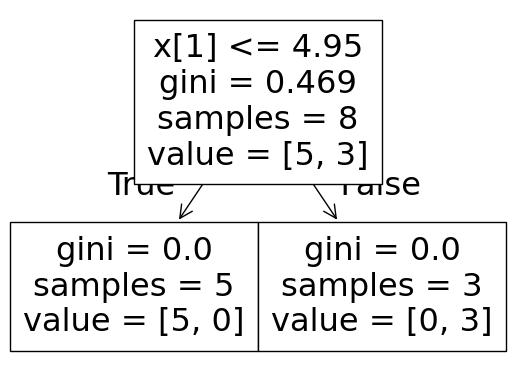

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


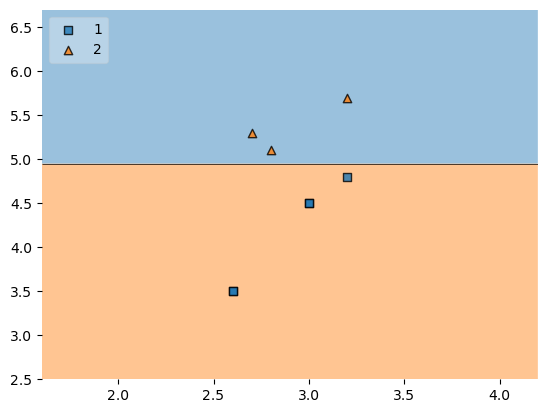

In [20]:
evaluate(dt_bag1,X,y)

In [21]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
114,2.8,5.1,2
70,3.2,4.8,1
130,2.8,6.1,2
111,2.7,5.3,2
114,2.8,5.1,2
70,3.2,4.8,1
130,2.8,6.1,2


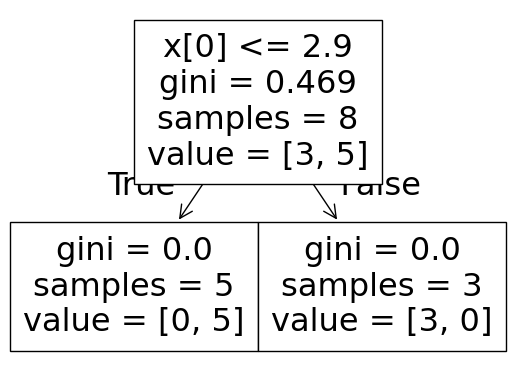

0.4


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


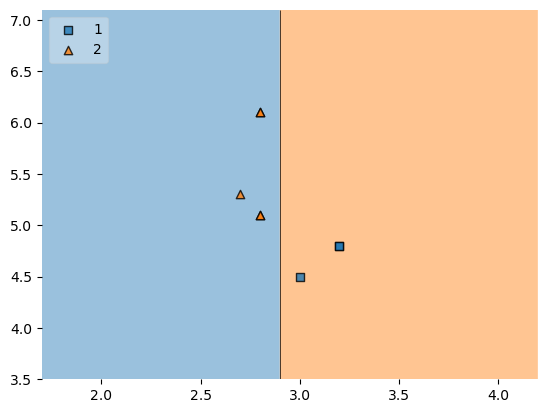

In [22]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [23]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
79,2.6,3.5,1
130,2.8,6.1,2
89,2.5,4.0,1
114,2.8,5.1,2
66,3.0,4.5,1
89,2.5,4.0,1
89,2.5,4.0,1
79,2.6,3.5,1


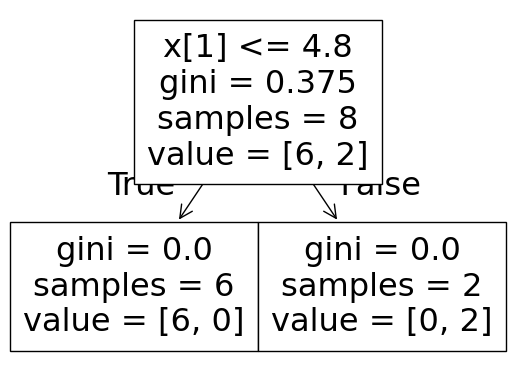

c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


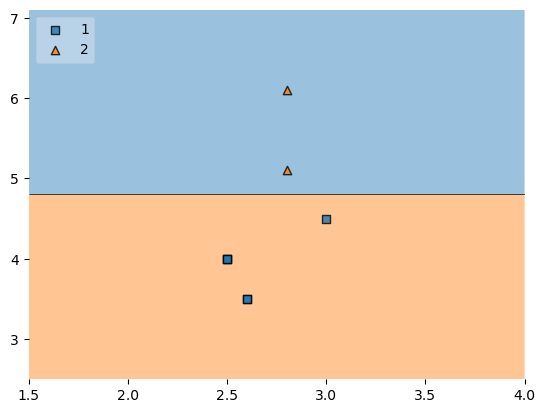

In [24]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict Values

In [25]:
df_test


,SepalWidthCm,PetalLengthCm,Species
143,3.2,5.9,2
97,2.9,4.3,1
77,3.0,5.0,1
133,2.8,5.1,2
93,2.3,3.3,1


In [26]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [27]:

# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
79,2.6,3.5,1
89,2.5,4.0,1
114,2.8,5.1,2
120,3.2,5.7,2
116,3.0,5.5,2
70,3.2,4.8,1
66,3.0,4.5,1
111,2.7,5.3,2
130,2.8,6.1,2


In [28]:

df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
114,2.8,5.1,2
130,2.8,6.1,2
89,2.5,4.0,1
116,3.0,5.5,2
79,2.6,3.5,1
111,2.7,5.3,2
120,3.2,5.7,2


# Random Subspaces

In [29]:

df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [30]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor


In [31]:

df1.sample(2,replace=True,axis=1)

,SepalWidthCm,PetalLengthCm
105,3.0,6.6
14,4.0,1.2
108,2.5,5.8
22,3.6,1.0
100,3.3,6.0
80,2.4,3.8
93,2.3,3.3
114,2.8,5.1
95,3.0,4.2
94,2.7,4.2


# Random Patches

In [32]:

df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
105,106,7.6,3.0,6.6,2.1,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor


In [33]:

df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,SepalWidthCm
100,6.3,3.3
100,6.3,3.3
100,6.3,3.3
93,5.0,2.3
80,5.5,2.4
80,5.5,2.4
80,5.5,2.4
14,5.8,4.0
